In [ ]:
# importing dataset
from zipfile import ZipFile

# specifying the zip file name
file_name = "fer_dataset_2.zip"

# opening the zip file in READ mode
with ZipFile('/content/fer_dataset_2.zip', 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
fer_dataset_2/dataset/sad/Training_81008287.jpg 2020-07-19 12:26:26         1218
fer_dataset_2/dataset/sad/Training_81013514.jpg 2020-07-19 12:26:26         1537
fer_dataset_2/dataset/sad/Training_81039583.jpg 2020-07-19 12:26:26         1767
fer_dataset_2/dataset/sad/Training_81048535.jpg 2020-07-19 12:26:26         1406
fer_dataset_2/dataset/sad/Training_81053420.jpg 2020-07-19 12:26:26         1254
fer_dataset_2/dataset/sad/Training_81075199.jpg 2020-07-19 12:26:26         1644
fer_dataset_2/dataset/sad/Training_81097657.jpg 2020-07-19 12:26:26         1673
fer_dataset_2/dataset/sad/Training_81101893.jpg 2020-07-19 12:26:26         1399
fer_dataset_2/dataset/sad/Training_81104314.jpg 2020-07-19 12:26:26         1664
fer_dataset_2/dataset/sad/Training_81116022.jpg 2020-07-19 12:26:26         1260
fer_dataset_2/dataset/sad/Training_81128509.jpg 2020-07-19 12:26:26         1525
fer_dataset_2/dataset/sad/Training_81161441.jpg 2020-07-19

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

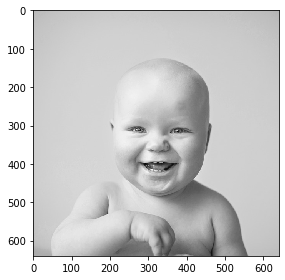

In [ ]:
# Loading the image
image1 = imread('/content/image.jpg')
imshow(image1);

In [ ]:
print(image1.shape)
print(image1.size)

(640, 640, 3)
1228800


In [ ]:
#pixels
import cv2
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img_load = cv2.imread("/content/image.jpg")
img_load

array([[[182, 182, 182],
        [182, 182, 182],
        [183, 183, 183],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [181, 181, 181]],

       [[183, 183, 183],
        [183, 183, 183],
        [183, 183, 183],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [181, 181, 181]],

       [[184, 184, 184],
        [184, 184, 184],
        [184, 184, 184],
        ...,
        [181, 181, 181],
        [181, 181, 181],
        [181, 181, 181]],

       ...,

       [[170, 170, 170],
        [170, 170, 170],
        [170, 170, 170],
        ...,
        [188, 188, 188],
        [188, 188, 188],
        [188, 188, 188]],

       [[171, 171, 171],
        [171, 171, 171],
        [171, 171, 171],
        ...,
        [188, 188, 188],
        [188, 188, 188],
        [188, 188, 188]],

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [188, 188, 188],
        [188, 188, 188],
        [188, 188, 188]]

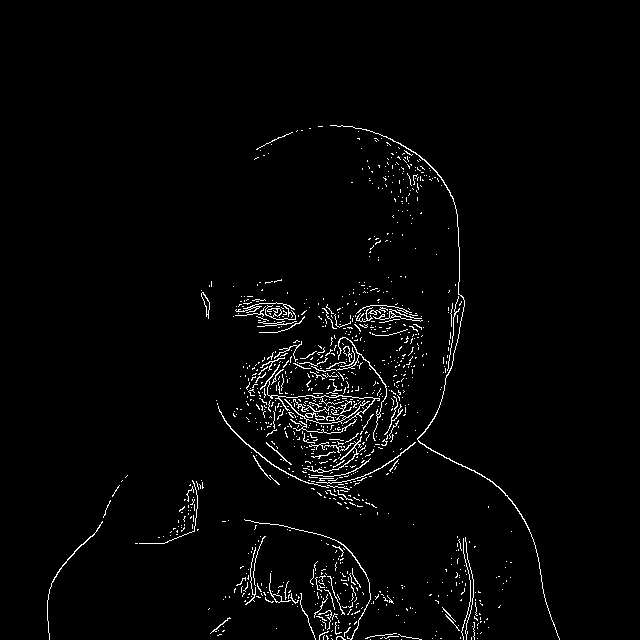

In [ ]:
#edges using Canny edge algorithm
from google.colab.patches import cv2_imshow
edges_of_image = cv2.Canny(img_load,48,48)
cv2_imshow(edges_of_image)

In [ ]:
# csv file

# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.initializers import  RandomNormal
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
%matplotlib inline

In [ ]:
# Loading and preprocessing images
data = pd.read_csv("/content/fer2013.csv")

emotions_names = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
data['emotion_name'] = data['emotion'].map(emotions_names)

pixels_values = data.pixels.str.split(" ").tolist()
pixels_values = pd.DataFrame(pixels_values, dtype=int)
images = pixels_values.values
images = images.astype(np.float)

test_idx_start = 32298
images_test = images[test_idx_start:]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Could not cast to int64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df = pd.read_csv('/content/fer2013.csv') #read dataset

df.head(5),df.shape

(   emotion                                             pixels     Usage
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training,
 (35887, 3))

In [ ]:
# Standarizing images
each_pixel_mean = images.mean(axis=0)
each_pixel_std = np.std(images, axis=0)
images = np.divide(np.subtract(images,each_pixel_mean), each_pixel_std)


image_pixels = images.shape[1]
image_width = image_height = np.ceil(np.sqrt(image_pixels)).astype(np.uint8)
labels_flat = data["emotion"].values.ravel()
labels_count = np.unique(labels_flat).shape[0]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D,MaxPool2D,ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import vgg16
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#for model deployement
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import img_to_array

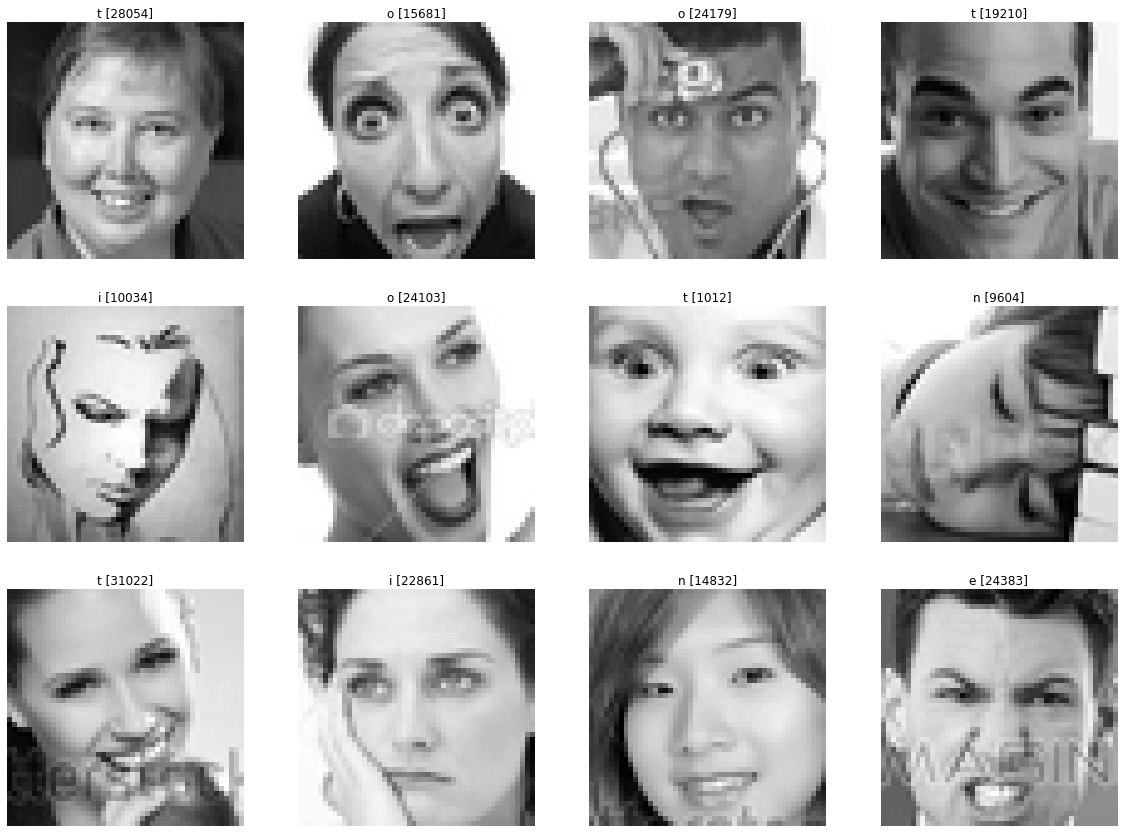

In [ ]:
# from PIL import Image
# pixels = df['pixels'][0]
# b = bytes(int(p) for p in pixels.split())
# i = Image.frombuffer('L',(48,48),b)
# di.save('a.png')
def visualize_images(n_img=4):
    indices = np.random.randint(0,df.shape[0],size=n_img)
#     print(indices)
    plt.figure(figsize=(20,20))
    for i,l in zip(indices,range(0,len(indices))):
        image_ar = np.array([i for i in  df['pixels'][i].split()] , dtype='float')
        pixels = np.reshape(image_ar,(48,48))
        ax = plt.subplot(4,4,l+1)
        plt.imshow(pixels,cmap='gray')
        plt.title('emotion'[df['emotion'][i]]+" ["+str(i)+"]")
        plt.xticks()
        plt.yticks([])
        plt.axis("off")
visualize_images(12)